In [1]:
import pandas as pd

df = pd.read_csv('./dataset/train_data.csv')
                #  dtype={'style': 'category'}, index_col=0)

# dtype={'Style': 'category'},
# カテゴリー型は、値となる文字列を分類して、
# 同じ文字列に同じ整数の代表値を与えて分析しやすくするためのものです。

In [2]:
# データセットの先頭5行を確認
df.head(5)

,id,position,age,area,sex,partner,num_child,education,service_length,study_time,commute,overtime,salary
0,0,1,44,愛知県,2,1,2,1,24,2.0,1.6,9.2,428.074887
1,1,2,31,奈良県,1,0,0,0,13,9.0,0.7,12.4,317.930517
2,2,2,36,山口県,1,0,0,2,14,4.0,0.4,16.9,357.350316
3,3,0,22,東京都,2,0,0,0,4,3.0,0.4,6.1,201.310911
4,4,0,25,鹿児島県,2,0,0,1,5,3.0,0.2,4.9,178.067475


In [3]:
# 基本統計量を確認
df.describe()

,id,position,age,sex,partner,num_child,education,service_length,study_time,commute,overtime,salary
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,10499.500000,1.226857,33.132476,1.498333,0.499333,0.999667,1.098571,12.303143,3.828476,1.059910,12.126752,361.170391
std,6062.322162,1.224682,10.715241,0.500009,0.500011,1.417459,1.116355,10.696823,3.312927,0.665307,5.509408,171.618501
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,110.622310
25%,5249.750000,0.000000,24.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.500000,8.300000,225.498117
50%,10499.500000,1.000000,30.000000,1.000000,0.000000,0.000000,1.000000,9.000000,3.000000,1.100000,12.100000,315.224583
75%,15749.250000,2.000000,42.000000,2.000000,1.000000,2.000000,2.000000,21.000000,6.000000,1.500000,15.800000,456.927443
max,20999.000000,4.000000,67.000000,2.000000,1.000000,9.000000,4.000000,49.000000,24.000000,4.800000,31.900000,1098.943632


In [4]:
# dropna　　で欠損値のある行を除去
df=df.dropna()

# reset_index　　でインデックス(左端の番号）を振り直す
# drop="True"をつけると古いインデックスを削除できます。
df=df.reset_index(drop="True")

In [5]:
# 欠損値を除去したデータフレームの先頭5行を確認
df.head()

,id,position,age,area,sex,partner,num_child,education,service_length,study_time,commute,overtime,salary
0,0,1,44,愛知県,2,1,2,1,24,2.0,1.6,9.2,428.074887
1,1,2,31,奈良県,1,0,0,0,13,9.0,0.7,12.4,317.930517
2,2,2,36,山口県,1,0,0,2,14,4.0,0.4,16.9,357.350316
3,3,0,22,東京都,2,0,0,0,4,3.0,0.4,6.1,201.310911
4,4,0,25,鹿児島県,2,0,0,1,5,3.0,0.2,4.9,178.067475


In [6]:
df.isnull().sum().sort_values(ascending=False)[:8]

salary            0
overtime          0
commute           0
study_time        0
service_length    0
education         0
num_child         0
partner           0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.area = le.fit_transform(df.area) 
df

,id,position,age,area,sex,partner,num_child,education,service_length,study_time,commute,overtime,salary
0,0,1,44,24,2,1,2,1,24,2.0,1.6,9.2,428.074887
1,1,2,31,10,1,0,0,0,13,9.0,0.7,12.4,317.930517
2,2,2,36,14,1,0,0,2,14,4.0,0.4,16.9,357.350316
3,3,0,22,26,2,0,0,0,4,3.0,0.4,6.1,201.310911
4,4,0,25,46,2,0,0,1,5,3.0,0.2,4.9,178.067475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,20995,0,27,31,2,0,0,1,7,2.0,0.2,15.5,181.735475
20996,20996,0,22,34,2,0,0,0,4,3.0,0.2,13.4,201.720711
20997,20997,3,36,29,2,0,0,2,14,4.0,0.8,12.7,364.386736
20998,20998,0,21,16,2,1,2,1,0,1.0,1.0,10.9,235.686449


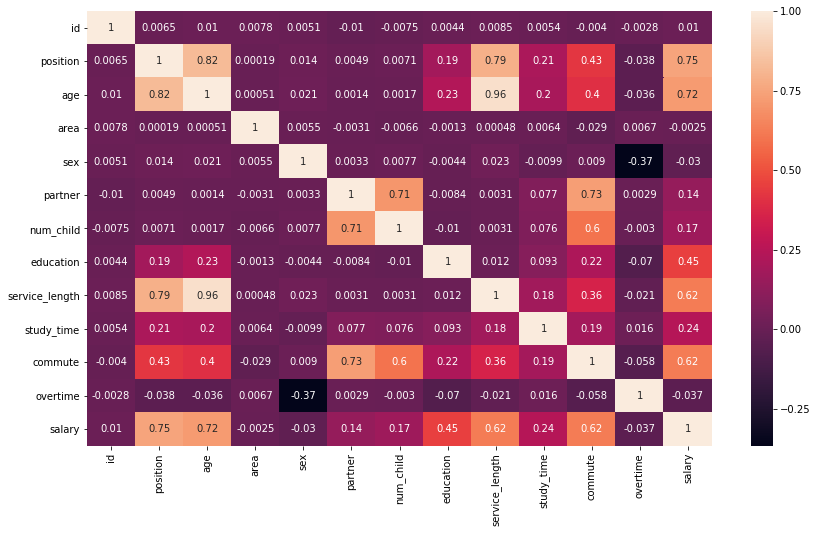

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True).set_ylim(13, 0);

In [9]:
df.to_pickle('df.pkl')

In [10]:
df[:2]

,id,position,age,area,sex,partner,num_child,education,service_length,study_time,commute,overtime,salary
0,0,1,44,24,2,1,2,1,24,2.0,1.6,9.2,428.074887
1,1,2,31,10,1,0,0,0,13,9.0,0.7,12.4,317.930517


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [12]:
import optuna
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np

def opt(trial):
    n_estimators = trial.suggest_int('n_estimators', 1, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 20)
    num_leaves = trial.suggest_int('num_leaves', 10, 30)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 20)
    subsample = trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1)
    colsample_bytree = trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1)
    model_opt = LGBMRegressor(
        random_state=0,
        n_estimators = n_estimators,
        max_depth = max_depth,
        num_leaves = num_leaves,
        min_child_weight = min_child_weight,
        subsample = subsample,
        colsample_bytree = colsample_bytree,
    )
    result=cross_validate(estimator=model_opt,X=X,y=y,cv=3,
                   scoring="neg_median_absolute_error",return_train_score=True)
    return np.mean(abs(result["test_score"]))

# クロスバリデーションにより、trainとtestのデータを区別を自動的に分割してやってくれる。
# しかも、N個に分割してN回評価できます。

# 注意することと言えば、Optunaは最小化問題を解くので、
# r2やAccuracyのように大きいほど良い値は適宜「小さいほど良い値」に書き換えてやらねばなりません。
# (returnの部分を、1-r2とすること)

model_opt=LGBMRegressor()
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(opt, n_trials=100)

6973721945497. Current best value is 15.771749107185732 with parameters: {'n_estimators': 848, 'max_depth': 16, 'num_leaves': 10, 'min_child_weight': 19, 'subsample': 0.7, 'colsample_bytree': 0.9}.
[I 2020-02-09 14:55:02,606] Finished trial#26 resulted in value: 16.20557829433017. Current best value is 15.771749107185732 with parameters: {'n_estimators': 848, 'max_depth': 16, 'num_leaves': 10, 'min_child_weight': 19, 'subsample': 0.7, 'colsample_bytree': 0.9}.
[I 2020-02-09 14:55:05,439] Finished trial#27 resulted in value: 15.917942349409108. Current best value is 15.771749107185732 with parameters: {'n_estimators': 848, 'max_depth': 16, 'num_leaves': 10, 'min_child_weight': 19, 'subsample': 0.7, 'colsample_bytree': 0.9}.
[I 2020-02-09 14:55:07,236] Finished trial#28 resulted in value: 15.890843493571632. Current best value is 15.771749107185732 with parameters: {'n_estimators': 848, 'max_depth': 16, 'num_leaves': 10, 'min_child_weight': 19, 'subsample': 0.7, 'colsample_bytree': 0.9}.

In [13]:
study.best_params

{'n_estimators': 848,
 'max_depth': 16,
 'num_leaves': 10,
 'min_child_weight': 19,
 'subsample': 0.7,
 'colsample_bytree': 0.9}

In [14]:
study.best_value

15.771749107185732

In [17]:
model=LGBMRegressor(n_estimators=848,max_depth=16,num_leaves=10,min_child_weight=19,
                    subsample=0.7,colsample_bytree=0.9,random_state=0).fit(X,y)

In [18]:
# 機械学習モデルをpickle化(先回、データフレームもpickel済)
with open("model.pkl","wb")as f:
    pickle.dump(model,f)